# Exercises for Session 6: Web Scraping 1

In session 5 you briefly touched upon extracting data from the internet. You worked with APIs which can be used to download data from a webpage in a structured way. Sometimes the webpage do not provide an API or the data you can download via the API is limited. In that case we will need to extract the data from the webpage ourselves. 

In the next three sessions you will learn how to extract data from a webpage when you cannot use an API. It involves mapping through the webpage (find the right URLs) and extracting the desired data from the webpage's HTML string (HTML: the underlying language behind a webpage).

*(Note: I recommend to use Chrome as your browser during the next three sessions. Lectures and exercises are solely based on Chrome.)*

# Part 1: Scraping Jobnet.dk

When we want to scrape a webpage, the first thing we do is to investigate the webpage. First, we need to get an overview of the URLs of all the webpages we want to scrape. Second, we download the HTML-string from the webpages. You can learn more about this in video 6.1:

(I might talk a bit slow in some of the videos. Remember that you can turn up the speed on Youtube)

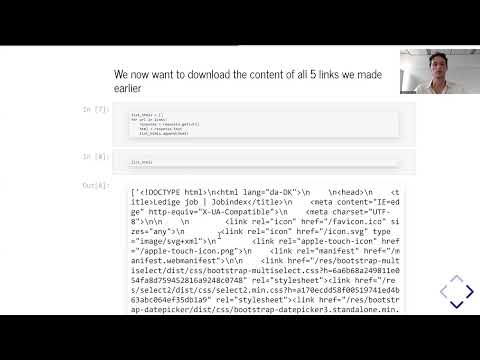

In [4]:
from IPython.display import YouTubeVideo
#YouTubeVideo('Xiu-acDIm28', width=640, height=360)

> **Ex. 6.1.1:** Go to  www.jobnet.dk and investigate the page. Locate the webpage that shows the job postings. Use the `request` module to extract the HTML-string of the webpage. 
>
> Remember to add name and email to the header of your request, so the website managers can see that you are not a malicious actor.

> *Note:* The HTML-string will not make a lot of sense right now, but try to take a look at it. In the next session we will learn how to extract data from the HTML-string.

> *Note:* The website is in Danish, but it should be no problem for non-Danish speaking persons to solve the exercises.

In [13]:
# YOUR CODE HERE
#!pip install requests
import requests
url = "https://job.jobnet.dk/CV/FindWork?Offset=0&SortValue=BestMatch"
headers={'name': 'Christian Knudsen', 'email':'cbk@kb.dk'}
html = requests.get(url, headers = headers)
#for ul in tqdm.tqdm(links):  tracker tid til compleation
html.text

'\r\n\r\n\r\n<!DOCTYPE html>\r\n<html class="no-js jobnet"\r\n      lang="da"\r\n      data-build="2023.2.0.129"\r\n      data-ng-app="Jobnet">\r\n\r\n<head data-jn-header-manager>\r\n    <meta charset="utf-8" />\r\n\r\n    <script src="https://cdn-eu.cookietractor.com/cookietractor.js" data-lang="da-DK" data-id="997a8f64-3979-4aaf-a7ad-d75d4a075a3e"></script>\r\n\r\n    \r\n    <title>Find job</title>\r\n    <meta name="description"\r\n          content="" />\r\n    <meta name="viewport"\r\n          content="width=device-width, initial-scale=1" />\r\n    \r\n    <link href="/CV/bundles/jobnet/styles/themes/jqueryui?v=tnDXbSoBDWbbJp6Mq-7PNZ2WgEiO41s0WI3Jpab9v5k1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/styles/normalization?v=8SYC4_fo8F7yKup3Ic3pmxETVZDCktLLOPXjtIVe2Zk1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/styles/normalizationprint?v=oRijEx5qJuAAPi5Biy05nn2lsj7dhIKZLJ8zNwNOAZs1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/s

When you have completed exercise 6.1.1 you have scraped your first webpage! I.e., you have retrieved the HTML-string of the webpage you wanted to extract data from. In session 7 we will learn how to get the relevant data from the HTML-string. But first we want to learn about how to go through all the webpages we want to scrape and retrieve the HTML-strings behind: `mapping`

> **Ex. 6.1.2:** Start your `mapping`: We want to figure out what URLs we need to scrape to collect job posting data. 

> You will see that there are 20 job postings per page, and that you can click through the pages with job postings on the bottom of the page. Figure out what the structure of the URL is, so you can click through the job posting pages by changing the URL. 

> Describe the structure of the URL in plain words below. What is the relevant paging parameter (the parameter you need to change to go to the next webpage) and how does it behave when you change page?

### Answer
Your answer here: Det er "Offset" der styrer. Vi starter med 0 og får 20. Den næste hdder "Offset = 20". 
Og så tilføjer vi https://job.jobnet.dk/CV/FindWork?Offset=0&SortValue=BestMatch sortvalue, så det virker.

> **Ex. 6.1.3:** Make a list of the URLs of the first 5 webpages with job postings.

> *Hint 1:* Design a `for loop` using the `range` function that changes the paging parameter in the URL.
>
> *Hint 2:* How do you change the paging parameter in the URL-string? Here string formatting is your friend! Read about it [here](https://realpython.com/python-string-formatting) (I recommend that you adopt the f-strings formatting which is a relatively new and nice feature in Python). 

In [24]:
# YOUR CODE HERE
urls = []
for i in range(0,5,1):
    url = f'https://job.jobnet.dk/CV/FindWork?Offset={i*20}&SortValue=BestMatch'
    urls.append(url)
urls

['https://job.jobnet.dk/CV/FindWork?Offset=0&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=20&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=40&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=60&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=80&SortValue=BestMatch']

> **Ex. 6.1.4:** Now loop through the list and scrape the HTML-strings of all 5 webpages using the `request` module again and save the HTML-strings in a list. 

> - Use the `time.sleep()` function to limit the rate of your calls. This is important to avoid overloading the webpage's server. Worst case, you can be banned from the website.

> - ***Extra:*** Monitor the time left to completing the loop by using `tqdm.tqdm()` function.

In [26]:
# YOUR CODE HERE
import tqdm
import time
html_hentet = []
for url in tqdm.tqdm(urls):
    html = requests.get(url, headers = headers)
    html_hentet.append(html.text)
    time.sleep(1)
html_hentet

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:06<00:00,  1.22s/it]


['\r\n\r\n\r\n<!DOCTYPE html>\r\n<html class="no-js jobnet"\r\n      lang="da"\r\n      data-build="2023.2.0.129"\r\n      data-ng-app="Jobnet">\r\n\r\n<head data-jn-header-manager>\r\n    <meta charset="utf-8" />\r\n\r\n    <script src="https://cdn-eu.cookietractor.com/cookietractor.js" data-lang="da-DK" data-id="997a8f64-3979-4aaf-a7ad-d75d4a075a3e"></script>\r\n\r\n    \r\n    <title>Find job</title>\r\n    <meta name="description"\r\n          content="" />\r\n    <meta name="viewport"\r\n          content="width=device-width, initial-scale=1" />\r\n    \r\n    <link href="/CV/bundles/jobnet/styles/themes/jqueryui?v=tnDXbSoBDWbbJp6Mq-7PNZ2WgEiO41s0WI3Jpab9v5k1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/styles/normalization?v=8SYC4_fo8F7yKup3Ic3pmxETVZDCktLLOPXjtIVe2Zk1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/styles/normalizationprint?v=oRijEx5qJuAAPi5Biy05nn2lsj7dhIKZLJ8zNwNOAZs1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/

#### In the video below (video 6.2) you will learn about logging and handling exceptions. Watch it before continuing with Ex.6.1.5

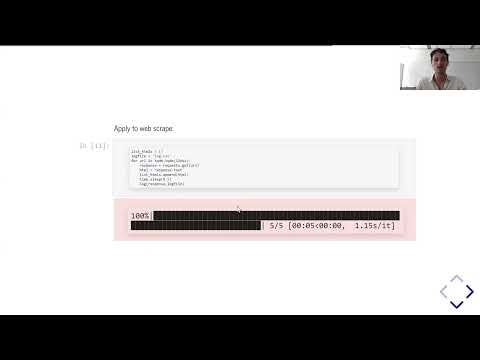

In [31]:
YouTubeVideo('d9fx8m7dQmI', width=640, height=360)

> **Ex. 6.1.5:** Repeat 6.1.4, but now log your activity as well. 

In [28]:
# YOUR CODE HERE
import os
# First define the log function to gather the log information
def log(response,logfile,output_path=os.getcwd()):
    # Open or create the csv file
    if os.path.isfile(logfile): #If the log file exists, open it and allow for changes     
        log = open(logfile,'a')
    else: #If the log file does not exist, create it and make headers for the log variables
        log = open(logfile,'w')
        header = ['timestamp','status_code','length','output_file']
        log.write(';'.join(header) + "\n") #Make the headers and jump to new line
        
    # Gather log information
    status_code = response.status_code #Status code from the request result
    timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time())) #Local time
    length = len(response.text) #Length of the HTML-string
    
    # Open the log file and append the gathered log information
    with open(logfile,'a') as log:
        log.write(f'{timestamp};{status_code};{length};{output_path}' + "\n") #Append the information and jump to new line

In [29]:
html_hentet = []
logfile = 'log6.1.5.csv'
for url in tqdm.tqdm(urls):
    response = requests.get(url, headers = headers)
    log(response, logfile)
    html_hentet.append(html.text)
    time.sleep(1)
html_hentet

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:06<00:00,  1.20s/it]


['\r\n\r\n\r\n<!DOCTYPE html>\r\n<html class="no-js jobnet"\r\n      lang="da"\r\n      data-build="2023.2.0.129"\r\n      data-ng-app="Jobnet">\r\n\r\n<head data-jn-header-manager>\r\n    <meta charset="utf-8" />\r\n\r\n    <script src="https://cdn-eu.cookietractor.com/cookietractor.js" data-lang="da-DK" data-id="997a8f64-3979-4aaf-a7ad-d75d4a075a3e"></script>\r\n\r\n    \r\n    <title>Find job</title>\r\n    <meta name="description"\r\n          content="" />\r\n    <meta name="viewport"\r\n          content="width=device-width, initial-scale=1" />\r\n    \r\n    <link href="/CV/bundles/jobnet/styles/themes/jqueryui?v=tnDXbSoBDWbbJp6Mq-7PNZ2WgEiO41s0WI3Jpab9v5k1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/styles/normalization?v=8SYC4_fo8F7yKup3Ic3pmxETVZDCktLLOPXjtIVe2Zk1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/styles/normalizationprint?v=oRijEx5qJuAAPi5Biy05nn2lsj7dhIKZLJ8zNwNOAZs1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/

> **Ex. 6.1.6:** It is a good idea to build a scraper that can handle exceptions (for example a link that for some reason does not exist or connection problems). Build such an exception into your scraper from 6.1.5, so you do not loose the scraped data if it crashes halfway through.

In [ ]:
# YOUR CODE HERE
html_hentet = []
logfile = 'log6.1.5.csv'
for url in tqdm.tqdm(urls):
    try:
        response = requests.get(url, headers = headers)
    except Exception as e:
        print(url)
        print(e)
    log(response, logfile)
    html_hentet.append(html.text)
    time.sleep(1)
html_hentet

# Part 2: Locating data through the network panel

Sometimes you may be fortunate to find the request that the webpage sends to the server to retrieve the data for the webpage. In that case, we can just replicate the request to receive the data in a structured format (JSON). Then we do not need to struggle with the HTML-strings.

To do this, we first need to find the request. For that purpose, the **network panel** in the Chrome Developer Tools is useful. The network panel monitors all the uploads and downloads to and from the webpage. You can read more about the network panel [here](https://developer.chrome.com/docs/devtools/network/).

**Watch the video below (video 6.3) before working on the exercises.**

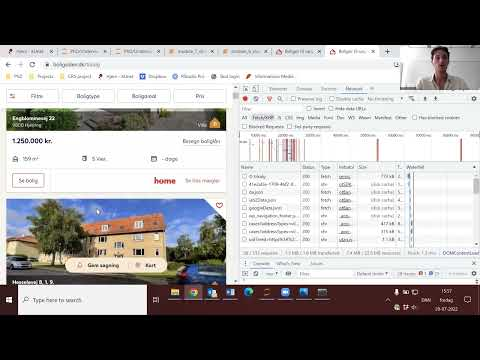

In [3]:
#YouTubeVideo('isUxBDzfWMg', width=640, height=360)

> **Ex. 6.2.1:** Go to the job posting page at www.jobnet.dk again. Open the network panel and choose *Fetch/XHR* type ([Read more: XMLHttpRequest](https://en.wikipedia.org/wiki/XMLHttpRequest)). If you update the page, you will see all the XHR resources the page generates. 

> Go through all the XHRs and find the XHR that carries the information about the different job postings. What is the name of the XHR?
>
>*Note: There is no smart way to do this. You just need to go through all the XHRs and inspect the information they carry.*

### Answer
Your answer here

> **Ex. 6.2.2:** Use the request URL to download the JSON file consisting of the first 20 job postings. Return the request result in JSON format.

In [34]:
# YOUR CODE HERE
req_url = "https://job.jobnet.dk/CV/FindWork/Search"
response = requests.get(req_url, headers = headers)
resultater = response.json()

> **Ex. 6.2.3:** The JSON file consists of three different key-value pairs. We are only interested in the pair that contains the job postings. Find the right key-value pair and convert the JSON data to a Pandas dataframe.

In [38]:
# YOUR CODE HERE
import pandas as pd
resultater = pd.DataFrame(resultater['JobPositionPostings'])
resultater

,AutomatchType,Abroad,Weight,Title,JobHeadline,Presentation,HiringOrgName,WorkPlaceAddress,WorkPlacePostalCode,WorkPlaceCity,...,HiringOrgCVR,UserLoggedIn,AnonymousEmployer,ShareUrl,DetailsUrl,JobLogUrl,HasLocationValues,ID,Latitude,Longitude
0,0,False,1.0,Gravermedhjælper i Seest Kirke søges pr. 1. ok...,Gravermedhjælper i Seest Kirke søges pr. 1. ok...,Vi har en ledig stilling som gravermedhjælper ...,SEEST MENIGHEDSRÅD,Kirketoft 2,6000,Kolding,...,36881410,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5886182,https://job.jobnet.dk/CV/FindWork/Details/5886182,True,5886182,55.4837,9.4394
1,0,False,1.0,Faglært eller Ufaglært afløsere og vikar søges...,Faglært eller Ufaglært afløsere og vikar søges...,"Birkebo er et selvejende plejehjem, der ligger...",Plejehjemmet Birkebo,Hellebo Park 98,3000,Helsingør,...,25524217,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5886059,https://job.jobnet.dk/CV/FindWork/Details/5886059,True,5886059,56.0501,12.5874
2,0,False,1.0,Regnskabsmedarbejder til selvstændig stilling ...,Regnskabsmedarbejder til selvstændig stilling ...,Til Frontmatec i Smørum søger ReQT Consulting ...,ReQT Consulting A/S,hassellunden 9,2765,Smørum,...,41735376,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5878422,https://job.jobnet.dk/CV/FindWork/Details/5878422,True,5878422,55.7314,12.2958
3,0,False,1.0,Informations- og økonomimedarbejder til Servic...,Informations- og økonomimedarbejder til Servic...,Ydelsescentret søger en engageret og servicemi...,Aalborg Kommune,John F. Kennedys Plads 1 B,9000,Aalborg,...,29189420,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5886197,https://job.jobnet.dk/CV/FindWork/Details/5886197,True,5886197,57.0437,9.9181
4,0,False,1.0,Plejehjemmet Havkær søger Sosu-hjælper eller S...,Plejehjemmet Havkær søger Sosu-hjælper eller S...,Om jobbet:Er du en natteravn? Har du truffet e...,Aarhus Kommune,Mosealléen 1-3,8381,Tilst,...,55133018,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5886196,https://job.jobnet.dk/CV/FindWork/Details/5886196,True,5886196,56.1913,10.1111
5,0,False,1.0,Salgssupport,Salgssupport,Verdens førende leverandør af intelligente bre...,Svendborg Brakes ApS,Jernbanevej 9,5882,Vejstrup,...,13256438,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5886195,https://job.jobnet.dk/CV/FindWork/Details/5886195,True,5886195,55.1106,10.7103
6,0,False,1.0,Botilbuddene CAS på Amagerfælledvej søger vika...,Botilbuddene CAS på Amagerfælledvej søger vika...,Her kan du som omsorgs- eller pædagogmedhjælpe...,Københavns Kommune,Borups Allé 177,2400,København NV,...,64942212,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5886051,https://job.jobnet.dk/CV/FindWork/Details/5886051,True,5886051,55.6960,12.5253
7,0,False,1.0,Snorregården søger en personlig assistent til ...,Snorregården søger en personlig assistent til ...,"At være personlig assistent (PA) består i, at ...",Københavns Kommune,Borups Allé 177,2400,København NV,...,64942212,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5886193,https://job.jobnet.dk/CV/FindWork/Details/5886193,True,5886193,55.6960,12.5253
8,0,False,1.0,Sygeplejerske med lyst til at gøre en forskel ...,Sygeplejerske med lyst til at gøre en forskel ...,Tænk hvis det var dig som sad klar til at besv...,AMK Vagtcentralenn,Lille Tornbjerg Vej 30,5220,Odense SØ,...,29190909,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5886037,https://job.jobnet.dk/CV/FindWork/Details/5886037,True,5886037,55.3750,10.4496
9,0,False,1.0,P.A. Andersen & Sønner søger dygtig butikschef...,P

> **Ex. 6.2.4:** At this point, we have information about the first 20 job postings. Now we want the job postings of the first 5 pages, i.e. the first 100 job postings. 

> Use the same procedure as in **Ex. 6.1.3-4** to download the first 100 postings and save them in a dataframe.
>
> *Note: Remember to limit the rate of your calls, log your activity, and think about how to handle exceptions.*

> *Hint: Recall the paging parameter from **Ex. 6.1.2**. You can use the same paging parameter in the new request URL to loop through the 5 pages.*

In [50]:
# YOUR CODE HERE
html_hentet = []

urls = [f'https://job.jobnet.dk/CV/FindWork/Search?Offset={i*20}' for i in range(0,5)]

logfile = 'log624.csv'
for url in tqdm.tqdm(urls):
    try:
        response = requests.get(url, headers = headers)
    except Exception as e:
        print(url)
        print(e)
    log(response, logfile)
    resultater=response.json()
    resultater = pd.DataFrame(resultater['JobPositionPostings'])

    html_hentet.append(resultater)
    time.sleep(1)
html_hentet

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:07<00:00,  1.45s/it]


[    AutomatchType  Abroad  Weight  \
 0               0   False     1.0   
 1               0   False     1.0   
 2               0   False     1.0   
 3               0   False     1.0   
 4               0   False     1.0   
 5               0   False     1.0   
 6               0   False     1.0   
 7               0   False     1.0   
 8               0   False     1.0   
 9               0    True     1.0   
 10              0   False     1.0   
 11              0   False     1.0   
 12              0   False     1.0   
 13              0   False     1.0   
 14              0   False     1.0   
 15              0   False     1.0   
 16              0   False     1.0   
 17              0   False     1.0   
 18              0   False     1.0   
 19              0   False     1.0   
 
                                                 Title  \
 0   Speciallæge i gastroenterologi til Medicinsk a...   
 1   PhD scholarship in Utilization of Fish Side-St...   
 2   Vacant PhD scholarshi

In [52]:
pd.concat(html_hentet)

,AutomatchType,Abroad,Weight,Title,JobHeadline,Presentation,HiringOrgName,WorkPlaceAddress,WorkPlacePostalCode,WorkPlaceCity,...,HiringOrgCVR,UserLoggedIn,AnonymousEmployer,ShareUrl,DetailsUrl,JobLogUrl,HasLocationValues,ID,Latitude,Longitude
0,0,False,1.0,Speciallæge i gastroenterologi til Medicinsk a...,Speciallæge i gastroenterologi til Medicinsk a...,\n\t\n\t\t\n\t\t\t\n\t\t\n\t\n\n\nDu vil blive...,Region Sjælland,Fjordvej 15,4800,Nykøbing F,...,29190658,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5886225,https://job.jobnet.dk/CV/FindWork/Details/5886225,True,5886225,54.7787,11.8599
1,0,False,1.0,PhD scholarship in Utilization of Fish Side-St...,PhD scholarship in Utilization of Fish Side-St...,PhD position for a strategic collaboration wit...,Danmarks Tekniske Universitet,Anker Engelunds Vej 101,2800,Kongens Lyngby,...,30060946,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5886107,https://job.jobnet.dk/CV/FindWork/Details/5886107,True,5886107,55.7859,12.5241
2,0,False,1.0,"Vacant PhD scholarship at the Faculty of Law, ...","Vacant PhD scholarship at the Faculty of Law, ...",Open PhD position in sustainability reporting ...,"KU - JUR - Fakultetet, Co Søndre Campus",Karen Blixens Plads 16,2300,København S,...,29979812,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5886151,https://job.jobnet.dk/CV/FindWork/Details/5886151,True,5886151,55.6621,12.5882
3,0,False,1.0,Assistance Tippy Aalborg,Assistance Tippy Aalborg,Tippy i Aalborg Storcenter søger en assistance...,Tippy Aalborg,Bredegade 1A,9000,Aalborg,...,15277734,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5831132,https://job.jobnet.dk/CV/FindWork/Details/5831132,True,5831132,57.0469,9.9235
4,0,False,1.0,VKAREN.DK søger for vores kunde i Bjæverskov e...,VKAREN.DK søger for vores kunde i Bjæverskov e...,Om jobbet: \nDu vil indgå i et tæt samarbejde ...,VKAREN.DK - Roskilde,,4632,Bjæverskov,...,27250343,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5886198,https://job.jobnet.dk/CV/FindWork/Details/5886198,True,5886198,55.4484,12.0269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0,False,1.0,ScanPeople søger en testoperatør til IRON Pump...,ScanPeople søger en testoperatør til IRON Pump...,"Drømmer du om et job, hvor du kan tilgodese di...",SCANPEOPLE ApS,,2860,Søborg,...,32568289,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5885972,https://job.jobnet.dk/CV/FindWork/Details/5885972,True,5885972,55.7380,12.4843
16,0,False,1.0,Lagermedarbejder søges til distributionsvirkso...,Lagermedarbejder søges til distributionsvirkso...,Er du dygtig på et lager og vant til at køre s...,SCANPEOPLE ApS,,2600,Glostrup,...,32568289,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5885969,https://job.jobnet.dk/CV/FindWork/Details/5885969,True,5885969,55.6742,12.3970
17,0,True,1.0,Danish speaking Cloud Customer Lifecycle Manag...,Danish speaking Cloud Customer Lifecycle Manag...,David Kennedy Recruitment has partnered with a...,David Kennedy Recruitment,,,,...,99999999,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5886177,https://job.jobnet.dk/CV/FindWork/Details/5886177,False,5886177,0.0000,0.0000
18,0,False,1.0,Dedikerede tømrerlærling søges til SydkystenBY...,Dedikerede tømrerlærling søges til SydkystenBY...,Søger du en læreplads inden for tømrer- og sne...,SCANPEOPLE ApS,,2680,Solrød Strand,...,32568289,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5885968,https://job.jobnet.dk/CV/FindWork/Details/5885968,True,5885968,55.5151,12.2607


> **Ex. 6.2.5 (optional):** What are the top 5 occupation areas with most job postings out of the 100 postings? How many job postings do the top 5 occupation areas have each?

In [86]:
# YOUR CODE HERE
samlet =pd.concat(html_hentet)
samlet.groupby("OccupationArea")["Abroad"].agg(n = "count").sort_values("n", ascending = False).head(5)


,n
OccupationArea,
Akademisk arbejde,19
"Sundhed, omsorg og personlig pleje",17
"Jern, metal og auto",9
"Pædagogisk, socialt og kirkeligt arbejde",9
"Vagt, sikkerhed og overvågning",7
